In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
# Load the dataset
df = pd.read_csv('Electric Vehicle Sales.csv')

In [4]:
# Display the first few rows of the dataset
print(df.head())

     Year Month_Name      Date           State         Vehicle_Class  \
0  2014.0        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014.0        jan  1/1/2014  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014.0        jan  1/1/2014  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                0.0  
1           Others       Others                0.0  
2           Others       Others                0.0  
3           Others       Others                0.0  
4              Bus          Bus                0.0  


In [10]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Check for missing values
print(df.isnull().sum())
# Fill missing values (if any) using median for numerical

df['EV_Sales_Quantity'].fillna(df['EV_Sales_Quantity'].median()
, inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_9748\1507149301.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EV_Sales_Quantity'].fillna(df['EV_Sales_Quantity'].median()


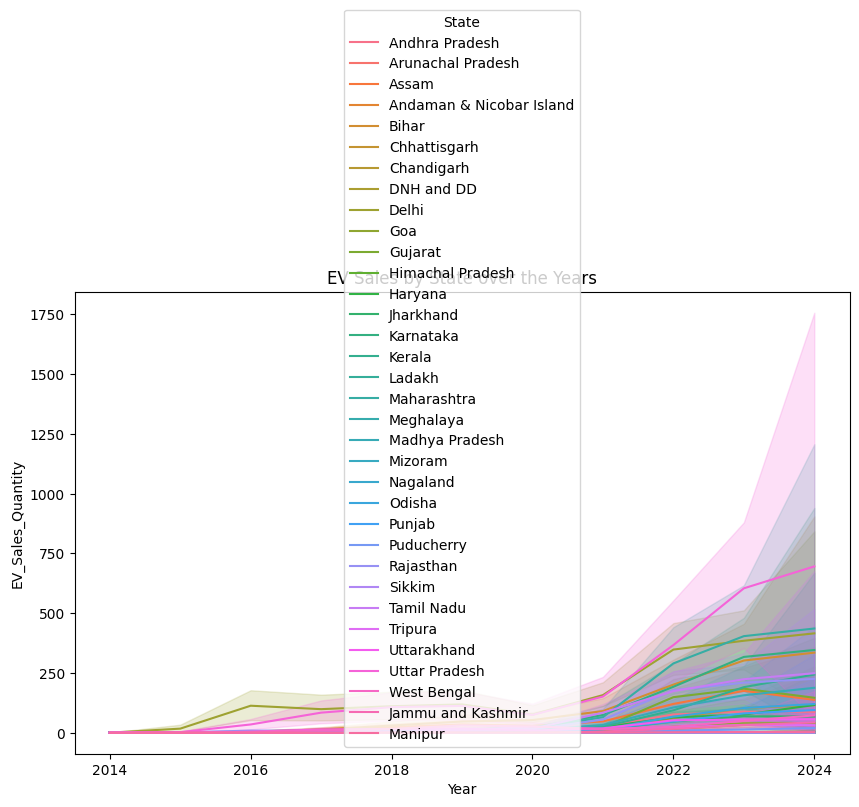

In [12]:
# Plot EV sales over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='EV_Sales_Quantity',
hue='State')
plt.title('EV Sales by State over the Years')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9748\848435328.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity',


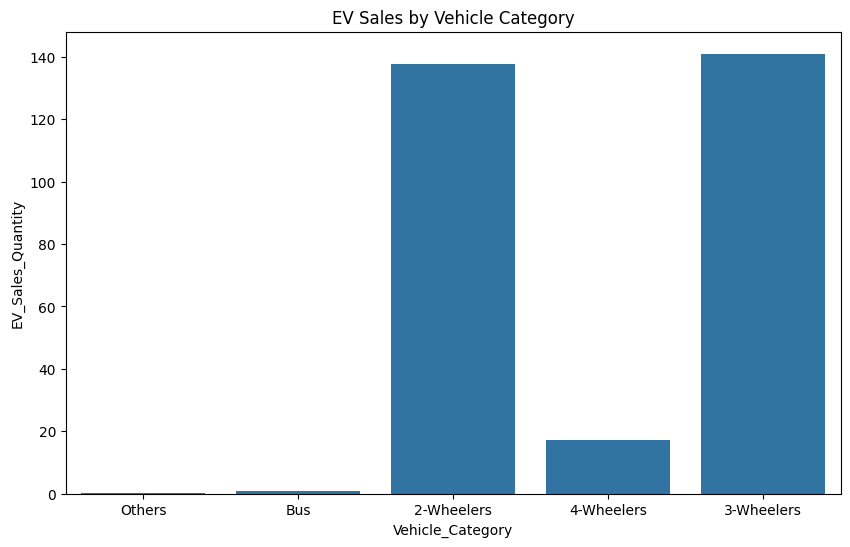

In [13]:
# Plot sales by vehicle category

plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity',
data=df, ci=None)
plt.title('EV Sales by Vehicle Category')
plt.show()

In [16]:
# Extract Month and Day from the Date column
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['State',
'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type'],
drop_first=True)
# Drop unnecessary columns like Date, Month_Name (if already
#extracted into numerical values
df_encoded.drop(['Date', 'Month_Name'], axis=1, inplace=True)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Split the data into features and target variable
X = df_encoded.drop('EV_Sales_Quantity', axis=1)
y = df_encoded['EV_Sales_Quantity']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
# Instantiate the model
model = RandomForestRegressor(n_estimators=100,
random_state=42)
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 130.58175227721011


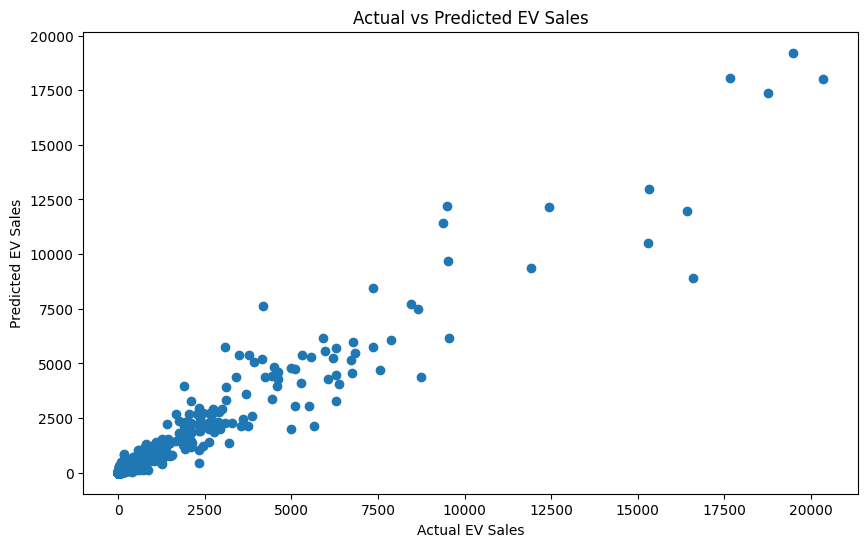

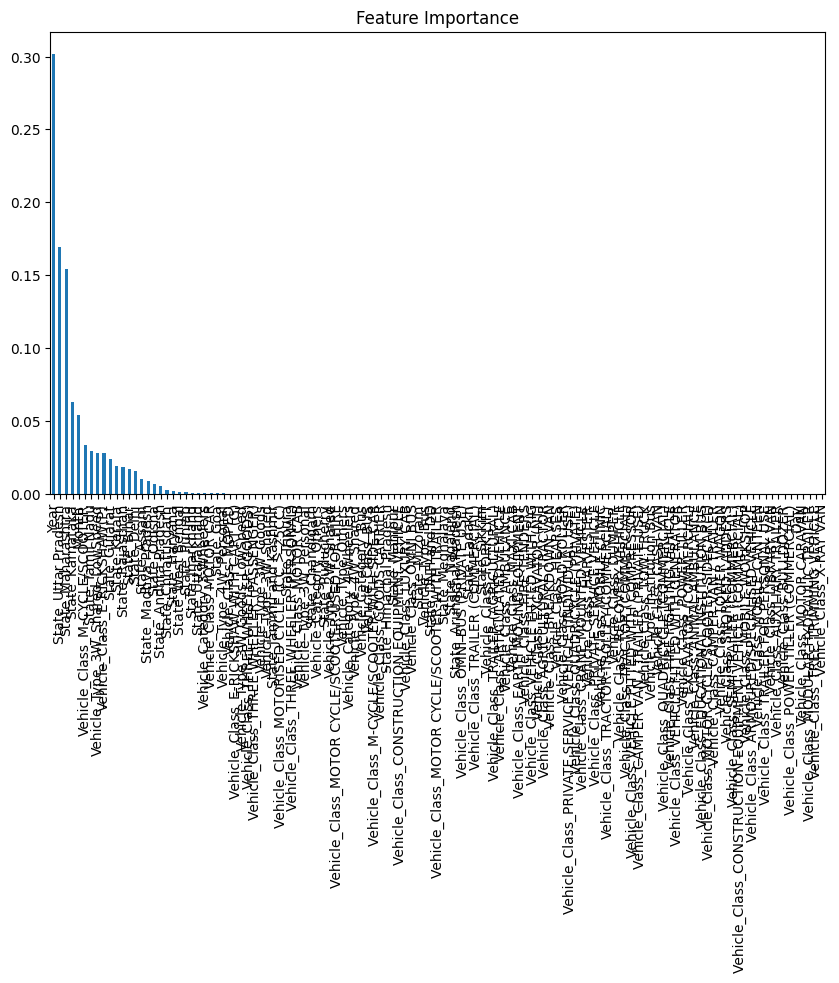

In [37]:
# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted EV Sales')
plt.xlabel('Actual EV Sales')
plt.ylabel('Predicted EV Sales')
plt.show()
# Check feature importance
importance = model.feature_importances_
feature_importance = pd.Series(importance,
index=X_train.columns).sort_values(ascending=False)
# Plot the most important features
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

Conclusion
The machine learning model helps in understanding the factors affecting Electric Vehicle sales across different states and predicting future sales based on historical data. Feature importance gives insight into which factors (e.g., State, Vehicle Category) have the highest impact on sales.

Explanation:

● Data Preprocessing: Cleaned the dataset and handled missing values.
● Feature Engineering: Created new columns from the Date column and
encoded categorical variables.
● Modeling: Built a Random Forest Regressor model to predict EV sales and
evaluated its performance using RMSE (Root Mean Squared Error).
● Visualization: Visualized sales trends and feature importance using bar plots
and scatter plots.